# Exploración Inicial de Datos

**Objetivo:**  
Comprender la estructura del dataset, validar su calidad, identificar patrones iniciales y definir hipótesis sobre el comportamiento de los sellers a partir de los ítems.

**Fases (CRISP-DM adaptado):**
- Entendimiento del negocio  
- Entendimiento de los datos  

**Preguntas guía:**
- ¿Qué variables tenemos a nivel ítem?
- ¿Cómo se distribuyen precios, stock, categorías y reputación?
- ¿Qué señales parecen relevantes para caracterizar a un seller?
- ¿Qué problemas de calidad de datos debemos considerar antes de transformar?


In [26]:
#Cargamos el dataset y probamos que lo podamos visualiar correctamente
import pandas as pd
import numpy as np

ruta = "../datos/crudo/data_por_producto.csv"
df = pd.read_csv(ruta)
df.head()

,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
2,2024-08-01,66d9659692,3 Piezas De Minoxidil 5% Anacastel,green_platinum,10066,FBM,new,False,363.00,660.00,HAIR,https://articulo.mercadolibre.com.mx/MLM-19360...,HAIR,CUIDADO DEL CABELLO
3,2024-08-01,5a39342818,Limpiador Cerave Control Imperfecciones Para P...,green_platinum,19678,FBM,new,False,241.00,410.00,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-18485...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
4,2024-08-01,5a39342818,Labial Líquido Maybelline Super Stay Matte Ink...,green_platinum,4862,FBM,new,False,133.47,152.49,FRAGRANCES & MAKE UP,https://articulo.mercadolibre.com.mx/MLM-15825...,FRAGRANCES & MAKE UP,FRAGANCIAS Y MAQUILLAJE


## 1. Dimensiones iniciales, tipos y revisión de duplicados

In [8]:

df.shape

(185250, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185250 entries, 0 to 185249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            185250 non-null  object 
 1   seller_nickname    185250 non-null  object 
 2   titulo             185250 non-null  object 
 3   seller_reputation  182878 non-null  object 
 4   stock              185250 non-null  int64  
 5   logistic_type      185250 non-null  object 
 6   condition          185250 non-null  object 
 7   is_refurbished     185250 non-null  bool   
 8   price              183734 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          185250 non-null  object 
 11  url                185250 non-null  object 
 12  category_id        185250 non-null  object 
 13  category_name      185250 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 18.6+ MB


In [10]:
df.isna().sum()

tim_day                   0
seller_nickname           0
titulo                    0
seller_reputation      2372
stock                     0
logistic_type             0
condition                 0
is_refurbished            0
price                  1516
regular_price        135294
categoria                 0
url                       0
category_id               0
category_name             0
dtype: int64

Aquí ya vemos la cantidad de nulos que tiene cada columna y nos pone a pensar la forma en que podemos procesarlos y limpiarlos

In [12]:
df.duplicated().value_counts()

False    185250
Name: count, dtype: int64

### Principales insights de análisis de variables, nulos y duplicados:

* Tenemos un total de 185.250 publicaciones y 14 características de las cuales no todas representan información valiosa para nuestro análisis
* No existen valores duplicados en nuestro dataset
* Existen 3 columnas con valores nulos: seller_reputation (1.3% de la base total), price (0.8% de la base total), regular_price(73% de la base total). Siendo esta última la más crítica y nos pone a pensar desde ya la forma en que podemos procesarla y limpiarla en un paso siguiente

## 2. Distribución de Sellers

En esta parte detectamos si hay vendedores dominantes o si la cola es muy larga, con eso sabemos si toca filtrar outliers, normalizar, balancear, etc

In [14]:
df['seller_nickname'].nunique()

46586

In [15]:
df['seller_nickname'].nunique()
df['seller_nickname'].value_counts().head(10)


seller_nickname
a9847ce81d    1421
5a39342818     877
77b179c68c     876
d5f5bc5f45     795
02cdf9f94d     510
a6d42f133e     484
92d2275dde     462
55c5031bc1     429
ca47ea1279     388
73479d561b     384
Name: count, dtype: int64

In [18]:
seller_counts = df['seller_nickname'].value_counts()
seller_counts.describe()

count    46586.000000
mean         3.976517
std         14.468409
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       1421.000000
Name: count, dtype: float64

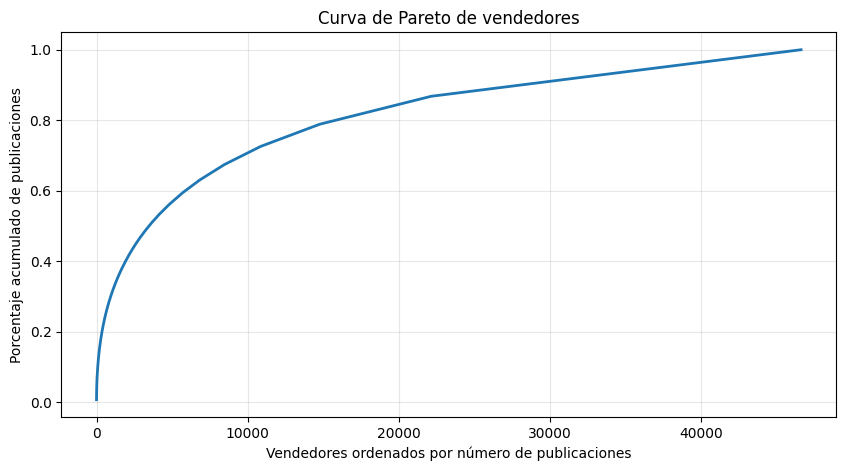

In [21]:
cum_pct = seller_counts.cumsum() / seller_counts.sum()

plt.figure(figsize=(10,5))
plt.plot(cum_pct.values, linewidth=2)
plt.title('Curva de Pareto de vendedores')
plt.xlabel('Vendedores ordenados por número de publicaciones')
plt.ylabel('Porcentaje acumulado de publicaciones')
plt.grid(True, alpha=0.3)
plt.show()


In [27]:
total_vendedores = len(seller_counts)
total_publicaciones = seller_counts.sum()
# Curva acumulada
cum_pct = seller_counts.cumsum() / total_publicaciones

# Vendedores requeridos para llegar al 80%
vendedores_80 = (cum_pct <= 0.80).sum()
porcentaje_vendedores_80 = vendedores_80 / total_vendedores

print(f"Porcentaje de vendedores que generan el 80% del catálogo: {porcentaje_vendedores_80:.2%}")
print(f"Número de vendedores necesarios: {vendedores_80:,}")


Porcentaje de vendedores que generan el 80% del catálogo: 33.92%
Número de vendedores necesarios: 15,802


In [32]:
df['valor_catalogo'] = df['price'] * df['stock']
agg = (df.groupby('seller_nickname')['valor_catalogo'].sum().sort_values(ascending=False))
agg.head()

seller_nickname
336fb09897    7.244734e+11
6453f36aa9    4.772354e+09
1a69e90893    4.573737e+09
ca26454a78    3.518720e+09
47e2104a4e    3.006424e+09
Name: valor_catalogo, dtype: float64

In [33]:
agg.describe()

count    4.658600e+04
mean     1.702223e+07
std      3.356846e+09
min      0.000000e+00
25%      2.400000e+03
50%      1.122360e+04
75%      6.900000e+04
max      7.244734e+11
Name: valor_catalogo, dtype: float64

In [59]:
total_valor = agg.sum()
cum_pct_valor = agg.cumsum() / total_valor
# Punto donde se alcanza el 80%
vendedores_80_valor = (cum_pct_valor <= 0.99).sum()
porcentaje_80_valor = vendedores_80_valor / agg.shape[0]

print(f"Porcentaje de vendedores que generan el 99% del valor: {porcentaje_80_valor:.2%}")
print(f"Número de vendedores necesarios: {vendedores_80_valor:,}")

Porcentaje de vendedores que generan el 99% del valor: 2.04%
Número de vendedores necesarios: 951


### Principales insights del análisis a nivel ítem / vendedor

- La mayoría de vendedores tiene muy pocas publicaciones: la mediana es 1 ítem y el 75% tiene ≤ 3 productos, mostrando una base amplia de sellers pequeños/ocasionales.

- La distribución de publicaciones es claramente *long-tail*: existe una cola larga de vendedores con muchas publicaciones, incluyendo outliers por encima de ~1.400 ítems.

- Al analizar el valor económico del catálogo (price × stock), se observa una concentración extrema: ~2% de los vendedores explican ~99% del valor total del inventario listado.

- Lo anterior hace que pensemos la coexistencia de dos grandes grupos: un conjunto muy reducido de vendedores profesionalizados con catálogos grandes y valiosos, y una masa amplia de vendedores con catálogos pequeños y bajo peso económico.

- Los valores extremos en precio, stock y valor de catálogo no se eliminarán de forma agresiva, ya que representan sellers potencialmente estratégicos; más adelante se considerarán transformaciones para que no dominen el modelo de clusterización.

- La heterogeneidad en tamaño e impacto económico de los sellers refuerza la motivación del problema: es razonable esperar clusters diferenciados por tamaño del catálogo, valor económico y nivel de profesionalización, lo que abre espacio para estrategias comerciales segmentadas.


## 3. Distribución de categorías


In [63]:
df['categoria'].value_counts().head(10)


categoria
SPORTS                          14252
HEALTH                          12587
BOOKS, MULTIMEDIA & OTHER E!    10355
TOYS AND GAMES                  10251
ACC CARS & VANS                 10128
OTHER                            7797
HOUSEHOLD APPLIANCES             7090
ANTIQUES & HOBBIES               6453
HOUSEHOLD ITEMS                  5569
APPAREL ACCESSORIES              5423
Name: count, dtype: int64

In [65]:
df['category_id'].value_counts().head(10)

category_id
SPORTS                          14252
HEALTH                          12587
BOOKS, MULTIMEDIA & OTHER E!    10355
TOYS AND GAMES                  10251
ACC CARS & VANS                 10128
OTHER                            7797
HOUSEHOLD APPLIANCES             7090
ANTIQUES & HOBBIES               6453
HOUSEHOLD ITEMS                  5569
APPAREL ACCESSORIES              5423
Name: count, dtype: int64

In [66]:
df['category_name'].value_counts().head(10)

category_name
DEPORTES                              14252
SALUD                                 12587
LIBROS, MULTIMEDIA Y OTROS            10355
JUGUETES Y JUEGOS                     10251
ACCESORIOS PARA AUTOS Y CAMIONETAS    10128
OTROS                                  7797
ELECTRODOMÉSTICOS                      7090
ANTIGÜEDADES Y PASATIEMPOS             6453
ARTÍCULOS DEL HOGAR                    5569
ACCESORIOS DE VESTIR                   5423
Name: count, dtype: int64

In [80]:
df['category_name'].nunique()

54

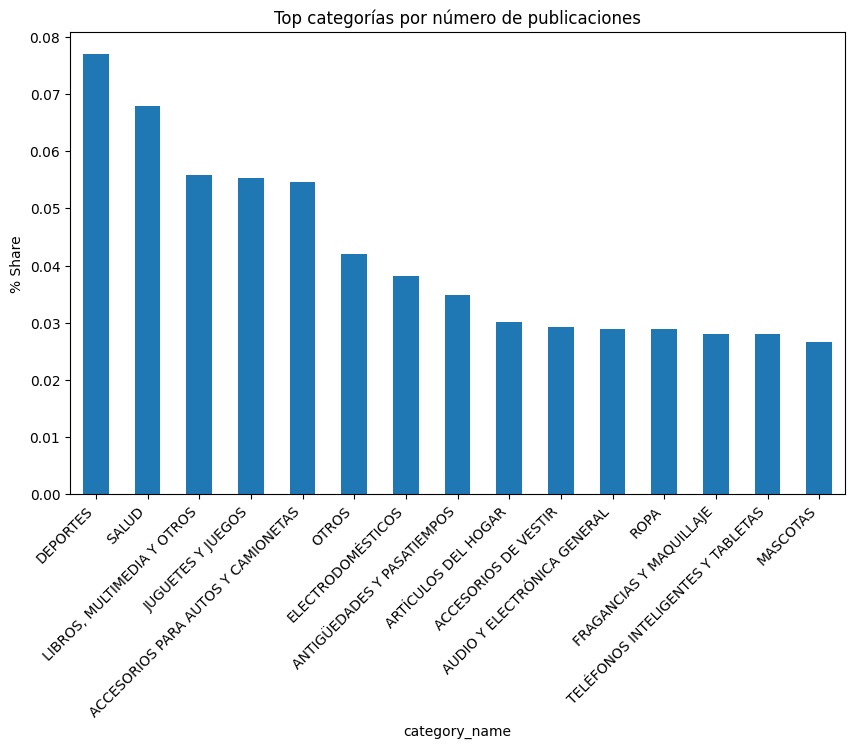

In [81]:
cat_counts = df['category_name'].value_counts()
cat_share = cat_counts / cat_counts.sum()
topN = cat_share.head(15)

plt.figure(figsize=(10,6))
topN.plot(kind='bar')
plt.title("Top categorías por número de publicaciones")
plt.ylabel("% Share")
plt.xticks(rotation=45, ha='right')
plt.show()



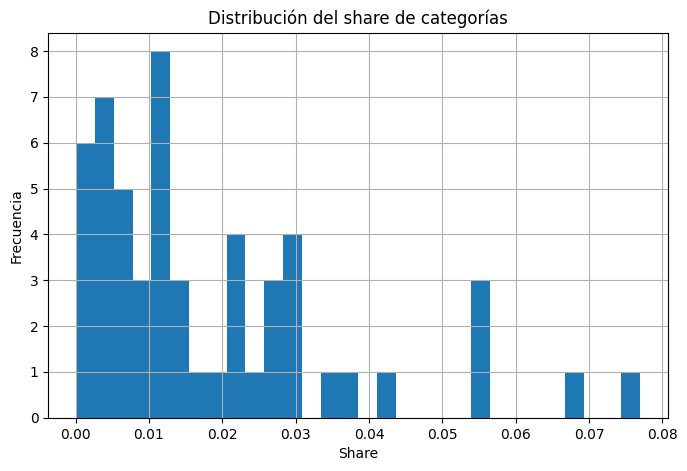

In [73]:
plt.figure(figsize=(8,5))
cat_share.hist(bins=30)
plt.title("Distribución del share de categorías")
plt.xlabel("Share")
plt.ylabel("Frecuencia")
plt.show()


### Insights sobre la distribución de categorías

- El catálogo está altamente diversificado: existen **54 categorías distintas**, lo cual indica una oferta muy amplia repartida en múltiples verticales.

- La categoría más grande (DEPORTES) representa solo **~7%** del total de publicaciones, seguida por SALUD ~6% y LIBROS MULTIMEDIA JUGUETES ~5–6%. No existe una categoría dominante.

- La mayoría de las categorías tiene un **share inferior al 2%**, como se observa en el histograma de distribución. Esto confirma que la oferta está distribuida entre muchos nichos pequeños. Catálogo no polarizado

- Esta diversificación implica que los vendedores probablemente estén especializados en diferentes nichos, lo que puede aportar variabilidad importante al análisis a nivel seller (por ejemplo, diversidad de categorías, especialización temática, etc.).

- Para el modelado futuro, esta estructura sugiere que la “variedad de categorías del seller” y la “categoría dominante” serán atributos potencialmente relevantes para la segmentación.


## 4. Precios y Stock


In [85]:
df['price'].describe()

count    1.837340e+05
mean     3.701531e+04
std      1.124158e+07
min      0.000000e+00
25%      2.700000e+02
50%      5.681000e+02
75%      1.387000e+03
max      4.772354e+09
Name: price, dtype: float64

In [86]:
df['stock'].describe()

count    185250.000000
mean        307.017090
std        3367.216679
min           0.000000
25%           2.000000
50%           8.000000
75%          42.000000
max       99999.000000
Name: stock, dtype: float64

In [92]:
# Top 5 productos mas caros
top5_price = df.nlargest(5, 'price')[['seller_nickname', 'titulo', 'price', 'stock']]
top5_price

,seller_nickname,titulo,price,stock
129575,6453f36aa9,"Gimnasio Con Aparatos De Peso Pesado, Puro Acero",4.772354e+09,1
119991,d55badc2e9,Moneda De 5 Pesos Conmemorativa De La Revoluci...,5.000000e+08,1
116998,7ff33520a8,Moneda De $20 Pesos Mexicanos,3.500000e+08,1
124519,9b7b2210aa,1 Moneda De Centavo De 1982d De Chica De Cobr...,2.431780e+08,1
125671,336fb09897,Best Choice Products Juego De Mesa De Competic...,7.194236e+07,10050


In [93]:
top5_stock = df.nlargest(5, 'stock')[['seller_nickname', 'titulo', 'price', 'stock']]
top5_stock

,seller_nickname,titulo,price,stock
22395,a6e623115f,Lampara 3 D Led Goku Dragon Ball Rgb 7 Colores,224.64,99999
22515,a6e623115f,Lampara 3d Led Ricky Y Morty Peace Among 7 C...,394.74,99999
28126,afba72bc81,Dvr 1080p Lite Hikvision Ds-7104hghi-k1(s) 4 T...,990.00,99999
37551,b44a9b3e65,2 Lechones Y 1 Cordero Entero En Canal,6840.03,99999
39005,34daaed96a,Kirkland Signature Papel Higienico Pack De 30 ...,799.00,99999


<Axes: >

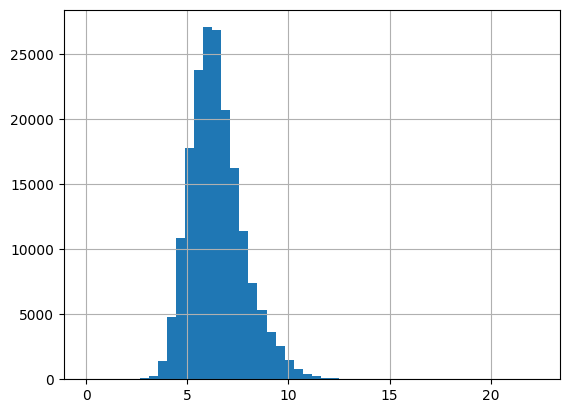

In [89]:
df['log_price'] = np.log1p(df['price'])
df['log_price'].hist(bins=50)

<Axes: >

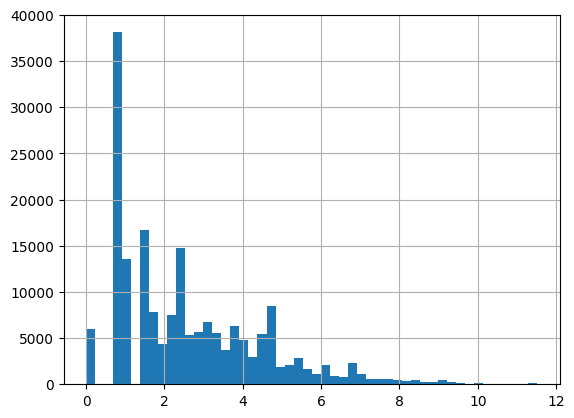

In [90]:
df['log_stock'] = np.log1p(df['stock'])
df['log_stock'].hist(bins=50)

### Insights sobre precios y stock

- Las estadísticas descriptivas de `price` muestran una distribución extremadamente sesgada: la mediana es ~568, mientras que el máximo llega a **4700 millones**, evidenciando outliers económicos enormes.

- `stock` presenta un patrón similar: la mediana es 8 unidades, pero existen ítems con **hasta 99.999 unidades**, lo que sugiere la presencia de vendedores mayoristas o catálogos artificialmente inflados. Además se detectan productos agotados o sin stock (6k aprox)

- Los histogramas originales son poco informativos debido a la magnitud de los outliers; por ello, se utilizó una transformación logarítmica solo para visualización, lo que permite observar la forma real de la distribución (concentración fuerte en rangos bajos y colas largas).

- Estas variables requerirán un tratamiento cuidadoso en la fase de modelado para evitar que los outliers dominen el clustering.

- El contraste entre la mediana y el valor máximo en ambas variables confirma la heterogeneidad estructural del marketplace: muchos vendedores pequeños conviviendo con muy pocos vendedores extremadamente grandes.


## 5. Reputación del Seller
**Escala de seller_reputation, de menor a mayor:**

0. Newbie
1. Red
2. Orange
3. Yellow
4. Light Green
5. Green
6. Green Silver
7. Green Gold
8. Green Platinum

In [95]:
#Cantidad de categorías distintas
df['seller_reputation'].nunique()


9

In [99]:
# Tabla única seller–reputación
rep_seller = df[['seller_nickname', 'seller_reputation']].drop_duplicates()
rep_seller.shape 


(46586, 2)

In [100]:
#Revisar si algún seller tiene más de una reputación
rep_multi = df.groupby('seller_nickname')['seller_reputation'].nunique().sort_values(ascending=False)
rep_multi.head()  # para ver ejemplos

seller_nickname
ffff407100    1
000631669c    1
0007153bca    1
000bee3c3b    1
000df2bd02    1
Name: seller_reputation, dtype: int64

In [102]:
#la tabla anterior ya nos confirma que el seller que mas reputaciones tiene tiene 1 sola pero confirmamos con la linea siguiente
rep_multi[rep_multi > 1].shape 

(0,)

In [103]:
rep_seller['seller_reputation'].value_counts()

seller_reputation
green             12970
newbie             6684
green_silver       6395
green_platinum     5776
green_gold         5354
yellow             2603
red                2089
light_green        1279
orange             1172
Name: count, dtype: int64

In [105]:
rep_seller['seller_reputation'].value_counts(normalize=True)

seller_reputation
green             0.292631
newbie            0.150805
green_silver      0.144285
green_platinum    0.130319
green_gold        0.120798
yellow            0.058729
red               0.047132
light_green       0.028857
orange            0.026443
Name: proportion, dtype: float64

In [107]:
rep_seller.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46586 entries, 0 to 185248
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   seller_nickname    46586 non-null  object
 1   seller_reputation  44322 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [108]:
rep_seller['seller_reputation'].isna().sum()
#cantidad de clietnes sin reputación

np.int64(2264)

### Insights sobre la reputación del seller

- La reputación se analizó a nivel vendedor, esto nos dejó **46.586 sellers únicos** que confirma la cifra dada en el item anterior

- La mayoría de vendedores tiene reputaciones positivas: **green (29%)**, **green_silver (14%)**, **green_platinum (13%)** y **green_gold (12%)**. Esto sugiere una base importante de vendedores con trayectoria y buen desempeño.

- También existe una proporción relevante de **newbies (15%)**, lo que indica entrada constante de nuevos sellers al marketplace y presencia de vendedores en fase temprana.

- Los niveles de reputación más bajos (**yellow, red, orange**) representan cerca del **11%** combinado, suficiente para diferenciar segmentos de menor confiabilidad o menor profesionalización.

- Existen **2.264 sellers sin reputación asignada** (~4.8%). Esto podría corresponder a vendedores nuevos, inactivos o casos sin información, se considerará su manejo en la fase de construcción del dataset a nivel seller.

- La diversidad en reputación es adecuada y aporta una dimensión valiosa para la futura segmentación de sellers, ya que refleja distintos niveles de experiencia, comportamiento y desempeño operativo dentro del marketplace.


## 6. Condition + Refurbished


In [109]:
df['condition'].value_counts(dropna=False)


condition
new              169616
used              15551
not_specified        83
Name: count, dtype: int64

In [111]:
df['condition'].value_counts(normalize=True)

condition
new              0.915606
used             0.083946
not_specified    0.000448
Name: proportion, dtype: float64

In [112]:
df['is_refurbished'].value_counts(dropna=False)


is_refurbished
False    184515
True        735
Name: count, dtype: int64

### Insights sobre condition y refurbished

- El catálogo está fuertemente dominado por productos **new**, que representan el **91.6%** de todas las publicaciones. Esto sugiere que la mayoría de los sellers ofrece inventario nuevo, típico de vendedores más formales o profesionales.

- Los productos **used** representan aproximadamente **8.4%**, lo cual indica la presencia de un segmento de reventa o vendedores que manejan inventarios secundarios. Aunque minoritario, este grupo aporta diversidad y puede señalar modelos de negocio diferentes.

- La categoría **not_specified** es prácticamente inexistente (<0.01%), lo que indica buena calidad de la metadata y una variable confiable.

- Respecto al reacondicionamiento, solo **735 publicaciones** (~0.4%) tienen `is_refurbished = True`, indicando que el segmento refurbished existe pero es pequeño. Aun así, puede señalar sellers especializados o tipos de inventario particulares.

- En conjunto, la mezcla entre productos nuevos, usados y reacondicionados será útil cuando se agregue la información a nivel seller, ya que permitirá diferenciar tipos de catálogo y niveles de profesionalización.


## 7. Logistic Type

- Definiciones de logistic_type: Se refiere al tipo logístico usado para el envío de productos.
- FLEX (self_service) → Entrega el mismo día, gestionada por el vendedor.
- FBM (fulfillment) → Mercado Libre maneja todo desde su almacén.
- DS (Drop_off) → Vendedor lleva al carrier.
- XD (Colectas (cross_docking)) → Carrier recoge en domicilio, pasa por HUB y luego entrega.
- XD (Places (xd_drop_off) ) → Vendedor deja en un Place, luego pasa por HUB y se entrega.

In [114]:
df['logistic_type'].value_counts(dropna=False)

logistic_type
XD      116763
FBM      31483
DS       24645
Otro     10541
FLEX      1818
Name: count, dtype: int64

In [115]:
df['logistic_type'].value_counts(normalize=True)

logistic_type
XD      0.630300
FBM     0.169949
DS      0.133036
Otro    0.056901
FLEX    0.009814
Name: proportion, dtype: float64

### Insights sobre logística del catálogo

- La variable `logistic_type` muestra una fuerte predominancia de **XD**, que representa aproximadamente **63%** de las publicaciones. Esto indica que la mayoría de los productos se gestionan mediante un flujo donde el vendedor entrega al carrier, o deja en un place y la paquetería usa un HUB intermedio

- El segundo tipo logístico más frecuente es **FBM (fulfillment by Mercado Libre)**, con **17%** del catálogo

- El método **DS (drop_off)** aporta otro **13%**, indicando vendedores que llevan manualmente los productos al carrier

- Los métodos **FLEX** 1% y Otro (~5.6%) tienen presencia marginal, lo cual sugiere que envíos inmediatos o configuraciones especiales no son predominantes en este dataset